In [1]:
import pandas
import matplotlib
import numpy
import math

In [2]:
pandas.options.mode.chained_assignment = None
#pandas.set_option('precision', 2)

In [3]:
df = pandas.read_csv('lab01/measurements-data/01_current_voltage.csv')
df

,napięcie na zasilaczu (V),napięcie na rezystorze (V),zakres pomiarowy (V),natężenie prądu (mA),zakres pomiarowy (mA)
0,10,8.80,10,22.80,200
1,9,8.00,10,20.50,200
2,8,7.00,10,17.93,20
3,7,6.20,10,15.74,20
4,6,5.20,10,13.51,20
5,5,4.40,10,11.23,20
6,4,3.60,10,9.06,20
7,3,2.60,3,6.76,20
8,2,1.80,3,4.50,20
9,1,0.86,1,2.29,20


In [56]:
[niepewnosc_woltomierza(x) for x in [10, 3, 1]]

[0.05773502691896258, 0.017320508075688773, 0.005773502691896258]

In [4]:
def niepewnosc_woltomierza(zakres, klasa=0.01):
    # na zajęciach pomijaliśmy niepewność ekperymentatora (patrz: tabelka 4 w protokole)
    return zakres*klasa/math.sqrt(3)

In [5]:
def niepewnosc_amperomierza(odczyt):
    # niepewnosc = (1.2% rdg + 1 dgt) / sqrt(3)
    def dgt(odczyt):
        # dla odczytów > 20 mieliśmy zakres 200, który pokazywał jedną cyfrę po przecinku
        # dla odczytów ≤ 20 mieliśmy zakres 20, który pokazywał dwie cyfry po przecinku
        if odczyt > 20:
            return 0.1
        return 0.01
    return (0.012 * odczyt + dgt(odczyt)) / math.sqrt(3)

In [133]:
niepewnosc_amperomierza(2.29)

0.021639088089227175

In [6]:
df['niepewność wyznaczenia napięcia (V)'] = df['zakres pomiarowy (V)'].apply(niepewnosc_woltomierza)
df['niepewność wyznaczenia natężenia prądu (mA)'] = df['natężenie prądu (mA)'].apply(niepewnosc_amperomierza)
df

,napięcie na zasilaczu (V),napięcie na rezystorze (V),zakres pomiarowy (V),natężenie prądu (mA),zakres pomiarowy (mA),niepewność wyznaczenia napięcia (V),niepewność wyznaczenia natężenia prądu (mA)
0,10,8.80,10,22.80,200,0.057735,0.215698
1,9,8.00,10,20.50,200,0.057735,0.199763
2,8,7.00,10,17.93,20,0.057735,0.129996
3,7,6.20,10,15.74,20,0.057735,0.114823
4,6,5.20,10,13.51,20,0.057735,0.099374
5,5,4.40,10,11.23,20,0.057735,0.083577
6,4,3.60,10,9.06,20,0.057735,0.068543
7,3,2.60,3,6.76,20,0.017321,0.052608
8,2,1.80,3,4.50,20,0.017321,0.036950
9,1,0.86,1,2.29,20,0.005774,0.021639


In [7]:
table_b = df[[
    'napięcie na rezystorze (V)',
    'zakres pomiarowy (V)',
    'niepewność wyznaczenia napięcia (V)',
    'natężenie prądu (mA)',
    'zakres pomiarowy (mA)',
    'niepewność wyznaczenia natężenia prądu (mA)'
]]
table_b.columns = [
    'wartość napięcia (V)',
    'zakres pomiarowy woltomierza (V)',
    'niepewność wyznaczenia napięcia (V)',
    'wartość natężenia prądu (mA)',
    'zakres pomiarowy amperomierza (mA)',
    'niepewność wyznaczenia natężenia prądu (mA)'
]
table_b

,wartość napięcia (V),zakres pomiarowy woltomierza (V),niepewność wyznaczenia napięcia (V),wartość natężenia prądu (mA),zakres pomiarowy amperomierza (mA),niepewność wyznaczenia natężenia prądu (mA)
0,8.80,10,0.057735,22.80,200,0.215698
1,8.00,10,0.057735,20.50,200,0.199763
2,7.00,10,0.057735,17.93,20,0.129996
3,6.20,10,0.057735,15.74,20,0.114823
4,5.20,10,0.057735,13.51,20,0.099374
5,4.40,10,0.057735,11.23,20,0.083577
6,3.60,10,0.057735,9.06,20,0.068543
7,2.60,3,0.017321,6.76,20,0.052608
8,1.80,3,0.017321,4.50,20,0.036950
9,0.86,1,0.005774,2.29,20,0.021639


In [8]:
print(table_b.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  wartość napięcia (V) &  zakres pomiarowy woltomierza (V) &  niepewność wyznaczenia napięcia (V) &  wartość natężenia prądu (mA) &  zakres pomiarowy amperomierza (mA) &  niepewność wyznaczenia natężenia prądu (mA) \\
\midrule
0 &                  8.80 &                                10 &                             0.057735 &                         22.80 &                                 200 &                                     0.215698 \\
1 &                  8.00 &                                10 &                             0.057735 &                         20.50 &                                 200 &                                     0.199763 \\
2 &                  7.00 &                                10 &                             0.057735 &                         17.93 &                                  20 &                                     0.129996 \\
3 &                  6.20 &                                10 &         

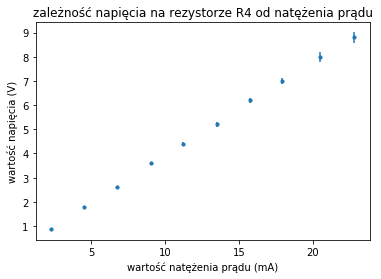

In [17]:
table_b.plot(
    title='zależność napięcia na rezystorze R4 od natężenia prądu',
    kind='scatter',
    s=10,  # "thickness" of points
    y='wartość napięcia (V)',
    x='wartość natężenia prądu (mA)',
    xerr=table_b['niepewność wyznaczenia napięcia (V)'],
    yerr=table_b['niepewność wyznaczenia natężenia prądu (mA)']
)
matplotlib.pyplot.savefig('out.pdf')

**Interpretacja wykresu**

Na podstawie pomiarów napięcia i natężenia możemy stwierdzić -- uwzględniając błędy pomiarowe -- że natężenie prądu rośnie wprost proporcjonalnie do napięcia. Stosunek napięcia do natężenia jest stały. Wyniki doświadczenia potwierdzają słuszność prawa Ohma.

## Regresja liniowa

Używając metody najmniejszych kwadratów można wyznaczyć współczynnik kierunkowy prostej $y = ax + b$.

Ponieważ napięcie i natężenie prądu są powiązane postacią $U = RI$, to przyjmujemy $b = 0$. Zatem dopasowywana prosta będzie postaci $y = ax$.

In [10]:
table_b.iloc[:,[0,2,3,5]]

,wartość napięcia (V),niepewność wyznaczenia napięcia (V),wartość natężenia prądu (mA),niepewność wyznaczenia natężenia prądu (mA)
0,8.80,0.057735,22.80,0.215698
1,8.00,0.057735,20.50,0.199763
2,7.00,0.057735,17.93,0.129996
3,6.20,0.057735,15.74,0.114823
4,5.20,0.057735,13.51,0.099374
5,4.40,0.057735,11.23,0.083577
6,3.60,0.057735,9.06,0.068543
7,2.60,0.017321,6.76,0.052608
8,1.80,0.017321,4.50,0.036950
9,0.86,0.005774,2.29,0.021639


Oznaczmy:

* $(I_1, I_2, \dots, I_{10}) = (22.80, 20.50, \dots, 2.29)$
* $(U_1, U_2, \dots, U_{10}) = (8.80, 8.00, \dots, 0.86)$
* TODO: jakoś nadać oznaczenia wszystkim kolumnom

Wtedy współczynnik kierunkowy szukanej prostej będzie szukaną rezystancją opornika. Ponadto, rezystancja ta będzie wyrażona wzorem:

$$a = \frac{\sum_{i = 1}^{10}\frac{I_i U_i}{u_{U_i}^2}}{\sum_{i = 1}^{10}\frac{I_i^2}{u_{U_i}^2}}$$

Z niepewnością wynoszącą:

$$u_a = \sqrt{\frac{1}{\sum_{i = 1}^{10}\frac{I_i^2}{u_{U_i}^2}}}$$

W celu wyznaczenia powyższych wartości pomocna będzie tabelka z pośrednimi wartościami obliczeń.

In [11]:
table_d = table_b.iloc[:,[0,2,3,5]]
table_d.columns = ['U', 'u_U', 'I', 'u_I']
table_d['I*U'] = table_d['U'] * table_d['I']
table_d['u_U^2'] = table_d['u_U'] ** 2
table_d['I^2'] = table_d['I'] ** 2
table_d['I^2 / u_U^2'] = table_d['I^2'] / table_d['u_U^2']
table_d['I*U / u_U^2'] = table_d['I*U'] / table_d['u_U^2']
table_d

,U,u_U,I,u_I,I*U,u_U^2,I^2,I^2 / u_U^2,I*U / u_U^2
0,8.80,0.057735,22.80,0.215698,200.6400,0.003333,519.8400,155952.000000,60192.000000
1,8.00,0.057735,20.50,0.199763,164.0000,0.003333,420.2500,126075.000000,49200.000000
2,7.00,0.057735,17.93,0.129996,125.5100,0.003333,321.4849,96445.470000,37653.000000
3,6.20,0.057735,15.74,0.114823,97.5880,0.003333,247.7476,74324.280000,29276.400000
4,5.20,0.057735,13.51,0.099374,70.2520,0.003333,182.5201,54756.030000,21075.600000
5,4.40,0.057735,11.23,0.083577,49.4120,0.003333,126.1129,37833.870000,14823.600000
6,3.60,0.057735,9.06,0.068543,32.6160,0.003333,82.0836,24625.080000,9784.800000
7,2.60,0.017321,6.76,0.052608,17.5760,0.000300,45.6976,152325.333333,58586.666667
8,1.80,0.017321,4.50,0.036950,8.1000,0.000300,20.2500,67500.000000,27000.000000
9,0.86,0.005774,2.29,0.021639,1.9694,0.000033,5.2441,157323.000000,59082.000000


In [19]:
print(table_d.to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
{} &     U &       u\_U &      I &       u\_I &       I*U &     u\_U\textasciicircum2 &       I\textasciicircum2 &    I\textasciicircum2 / u\_U\textasciicircum2 &   I*U / u\_U\textasciicircum2 \\
\midrule
0 &  8.80 &  0.057735 &  22.80 &  0.215698 &  200.6400 &  0.003333 &  519.8400 &  155952.000000 &  60192.000000 \\
1 &  8.00 &  0.057735 &  20.50 &  0.199763 &  164.0000 &  0.003333 &  420.2500 &  126075.000000 &  49200.000000 \\
2 &  7.00 &  0.057735 &  17.93 &  0.129996 &  125.5100 &  0.003333 &  321.4849 &   96445.470000 &  37653.000000 \\
3 &  6.20 &  0.057735 &  15.74 &  0.114823 &   97.5880 &  0.003333 &  247.7476 &   74324.280000 &  29276.400000 \\
4 &  5.20 &  0.057735 &  13.51 &  0.099374 &   70.2520 &  0.003333 &  182.5201 &   54756.030000 &  21075.600000 \\
5 &  4.40 &  0.057735 &  11.23 &  0.083577 &   49.4120 &  0.003333 &  126.1129 &   37833.870000 &  14823.600000 \\
6 &  3.60 &  0.057735 &   9.06 &  0.068543 &   32.6160 &  0.003333 &

In [12]:
sums = table_d.sum(0)
print('licznik: {}\nmianownik: {}'.format(sums['I*U / u_U^2'], sums['I^2 / u_U^2']))
a = sums['I*U / u_U^2'] / sums['I^2 / u_U^2']
print('a = licznik/mianownik = {}'.format(a))

licznik: 366674.06666666665
mianownik: 947160.0633333332
a = licznik/mianownik = 0.38712999086578187


$$u_a = \sqrt{\frac{1}{\sum_{i = 1}^{10}\frac{I_i^2}{u_{U_i}^2}}}$$

In [13]:
u_a = 1 / sums['I^2 / u_U^2'] ** 0.5
print('u_a = {}'.format(u_a))

u_a = 0.001027515332382447


Zatem opór opornika $R_4$ wynosi:

$$R_4 = TODO: jednostki + niepewność$$

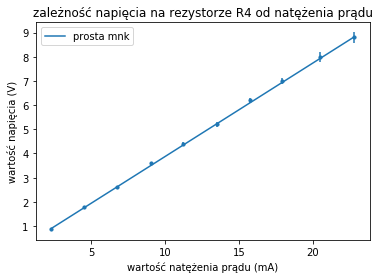

In [104]:
axes = table_b.plot(
    title='zależność napięcia na rezystorze R4 od natężenia prądu',
    kind='scatter',
    s=10,  # "thickness" of points
    y='wartość napięcia (V)',
    x='wartość natężenia prądu (mA)',
    xerr=table_b['niepewność wyznaczenia napięcia (V)'],
    yerr=table_b['niepewność wyznaczenia natężenia prądu (mA)']
)

def best_linear_fit(a, start, end, n=10):
    x = numpy.linspace(start, end, n)
    y = a * x
    return [x, y]

x, y = best_linear_fit(a, table_b['wartość natężenia prądu (mA)'].min(), table_b['wartość natężenia prądu (mA)'].max())
pandas.DataFrame(data={'prosta mnk': y}, index=x).plot(ax=axes)
matplotlib.pyplot.savefig('regression.pdf')

In [31]:
table_e = pandas.read_csv('lab01/measurements-data/03_current_voltage.csv')
table_e

,napięcie na zasilaczu (V),napięcie na rezystorze (V),zakres pomiarowy (V),natężenie prądu (mA),zakres pomiarowy (mA),Rezystor
0,6,2.85,3,55.3,200,R1
1,6,4.00,10,38.5,200,R2
2,6,4.00,10,38.5,200,R3


Przy zakresie $Z(U)$, niepewność $u_U = \frac{1\% \cdot Z(U)}{\sqrt{3}}$.

Przy zakresie $Z(I)$, niepewność $u_I = \frac{1.2\% \text{rdg} + 1 \text{dgt}}{\sqrt{3}}$.

Niepewność rezystancji wyznaczonej za pomocą wzoru $R = \frac{U}{I}$ wynosi:

$$u_R = \sqrt{(\frac{\partial R}{\partial U})^2 \cdot u_U^2 + (\frac{\partial R}{\partial I})^2 \cdot u_I^2} = \sqrt{\frac{1}{I^2} \cdot u_U + \frac{U^2}{I^2} \cdot u_I}$$

In [32]:
table_e2 = pandas.read_csv('lab01/measurements-data/04_current_voltage_resistance.csv')
table_e2

,napięcie (V),niepewność (V),natężenie prądu (mA),niepewność (mA),rezystancja (Ω),niepewność (Ω),Rezystor
0,2.85,0.017,55.3,0.4,51.5,NaN,R1
1,4.00,0.060,38.5,0.3,103.9,NaN,R2
2,4.00,0.060,38.5,0.3,103.9,NaN,R3


In [47]:
def niepewnosc_rezystancji(u, i, uu, ui):
    return math.sqrt(uu/i**2 + u**2/i**2 * ui)

In [55]:
niepewnosc_amperomierza(38.5)

0.3244708512845697

In [123]:
table_last = pandas.read_csv('lab01/measurements-data/06_thickness.csv')

In [124]:
thickness = table_last['grubość (mm)']

In [125]:
thickness = thickness.drop([8]) # błąd gruby

In [126]:
x = thickness.mean()
s_x = math.sqrt(((thickness-x)**2).sum()/58)
s_x/59**0.5

0.0008415927979889736

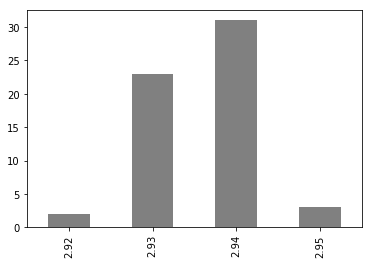

In [128]:
vc = thickness.value_counts()
vc.sort_index().plot(kind='bar', color='grey')
matplotlib.pyplot.savefig('hist.pdf')